# Handwritten letters images recognition

In [ ]:
#load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
import spliting

## 1. Data processing 


In [ ]:
# Spliting images from dataset to train and test folder 

spliting.img_split_train_test('../alphabet-dataset/', 0.6)


In [ ]:
train_path = "../data/train/"
test_path = "../data/test/"
pred_path ="../data/predict/"

# check Train and Test folder
for folder in os.listdir(train_path):
    files = gb.glob(pathname= str(train_path + folder + '/*.png'))
    print(F' For training data found : {len (files)} in folder {folder}')


In [ ]:
for folder in os.listdir(test_path):
    files = gb.glob(pathname= str(test_path + folder + '/*.png'))
    print(F' For training data found : {len (files)} in folder {folder}')

In [11]:
# 
categories = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "J":9, "K":10, "L":11, "M":12, "N":13, "O":14, "P":15, "Q":16, "R":17, "S":18, "T":19, "U":20, "V":21, "W":22, "X":23, "Y":24, "Z":25}

def get_letter(n):
    for x, y in categories.items():
        if n == y:
            return x
print(get_letter(24))

Y


## . Reading Images

In [ ]:

# Display 10 images for F letter  with plot imshow
for category in categories.keys():
    if category =='F': 
        path = os.path.join(train_path,category)  
        x=0
        for img in os.listdir(path):  
            x+=1
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
            plt.imshow(img_array, cmap='gray')
            plt.show()  
            if x==10 : 
                break

In [ ]:
# Read all images in train folder and convert it into array for 26 categories
X_train =[]
y_train =[]
for folder in os.listdir(train_path):
    images = gb.glob(pathname= str(train_path + folder + '/*.png'))
    for img in images:
        image = cv2.imread(img)
        X_train.append(list(image))
        y_train.append(categories[folder])



In [ ]:
print(f"we have  {len(X_train)} items in X_train" )

In [ ]:
# Display random images in X_train  using y value for title
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_letter(y_train[i]))

In [ ]:
# Read all images in test folder and convert it into array for 26 categories
X_test =[]
y_test =[]
for folder in os.listdir(test_path):
    images = gb.glob(pathname= str(test_path + folder + '/*.png'))
    for img in images:
        image = cv2.imread(img)
        X_test.append(list(image))
        y_test.append(categories[folder])

In [ ]:
# Display random images in X_test  using y value for title
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_letter(y_test[i]))

In [6]:
X_pred = []
images = gb.glob(pathname= str(pred_path + '/*.png'))
print(len(images))
for img in images: 
    image = cv2.imread(img)
    image_array = cv2.resize(image , (28,28))
    X_pred.append(list(image_array))

59


In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

## . Building The CNN Model 

In [8]:
Convert the data into array using numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)
X_pred = np.array(X_pred)

In [ ]:
print(f'X_train shape  is {X_train.shape}')
# print(f'X_test shape  is {X_test.shape}')

# print(f'y_train shape  is {y_train.shape}')
# print(f'y_test shape  is {y_test.shape}')

In [ ]:
cnn_model = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),    
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),    
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Flatten() ,    
        keras.layers.Dense(256, activation = "relu") ,   
        keras.layers.Dropout(rate=0.5), 
               
                   
        keras.layers.Dense(26,activation='softmax')    
        ])

In [ ]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

cnn_model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])



In [ ]:
print('Model Details are : ')
print(cnn_model.summary())

## . Training Model

In [ ]:


epochs = 6
final_model = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size= 64, verbose=1)



In [ ]:
#save model 
cnn_model.save('../cnn_model/CNNModel.model')

In [ ]:
ModelLoss, ModelAccuracy =cnn_model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [9]:
new_cnn_model =  keras.models.load_model('../cnn_model/CNNModel.model') 

y_pred = new_cnn_model.predict(X_pred)




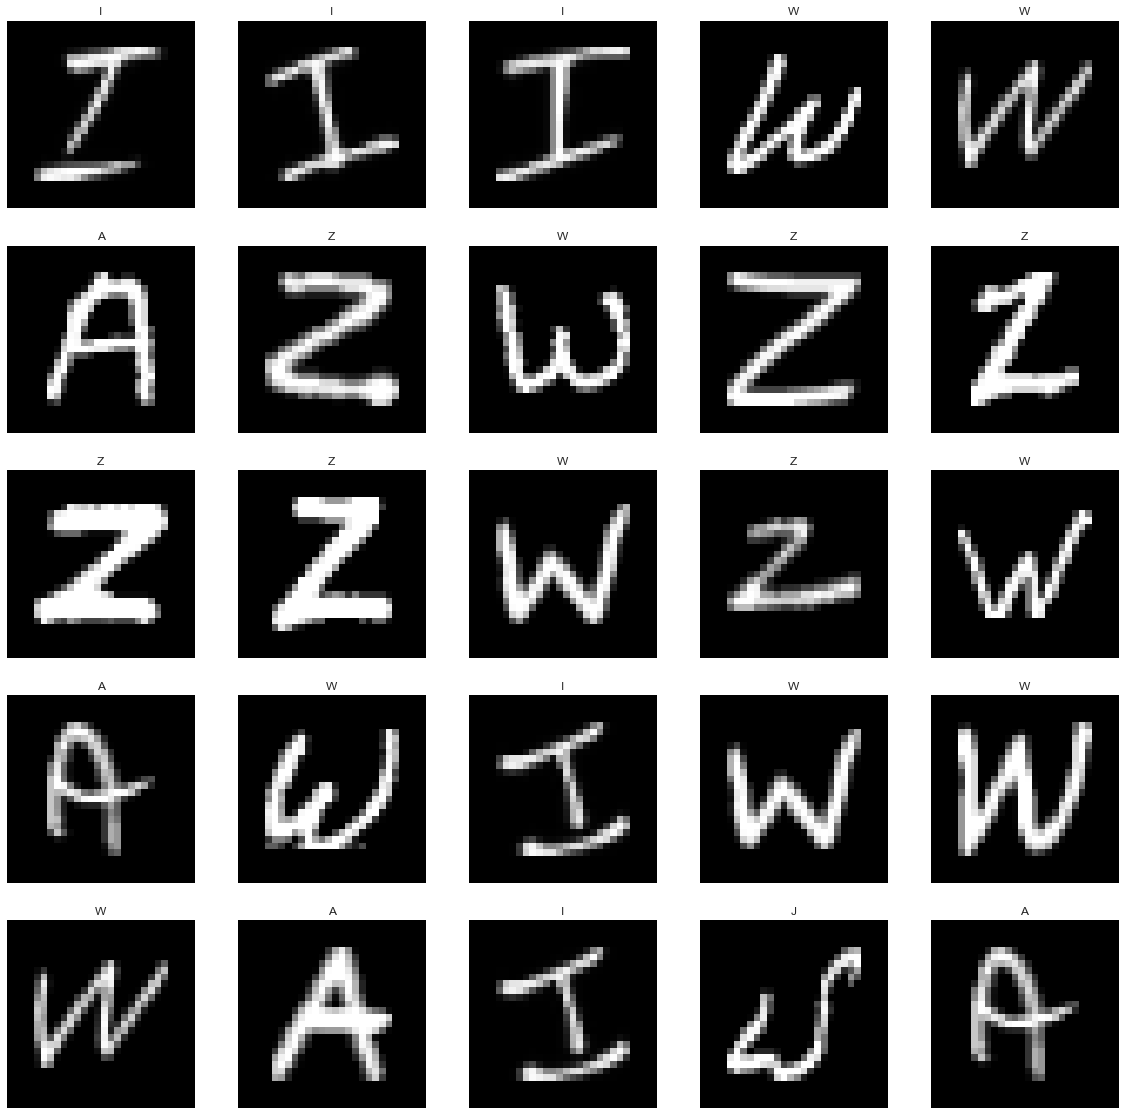

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),25))) : 
    plt.subplot(5,5,n+1) 
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(get_letter(np.argmax(y_pred[i])))